In [3]:
import pandas as pd
import os
os.getcwd()

'C:\\Users\\user\\Documents\\Coursera\\Week 2 Intro to optimization and efficient frontier'

In [6]:
ind=pd.read_csv("data\\ind30_m_vw_rets.csv", index_col=0, header=0, parse_dates=True)/100
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
192607,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
192608,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
192609,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
192610,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
192611,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [9]:
ind.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

#### The index column should be in a datetime format but instead it is set as an integer

So, how doe fix this?

In [13]:
ind.index=pd.to_datetime(ind.index, format="%Y%m").to_period("M")
ind.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110, freq='M')

In [14]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [16]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

#### Look at the list right above. Do you see a problem in there anywhere?

Nope, what are you talking about?

#### These are very tiny and trivial problems that you are gonna see many times. In this case, we have a problem of extra space in the headers of the columns.

#### Observe closely, after Food, there is an extra space. This means that python thinks that the column is named "Food " and not "Food". This will be a problem later on if we try to call these columns by their name

So, how do we fix it? Do we have to manually rewrite each of the column that has these sort of issues?

#### Not really. We have a method that will save us lot of time and hassle

In [17]:
ind.columns=ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

#### There you go, problem solved..!

In [19]:
ind.shape

(1110, 30)

### Lets now copy and paste all the code that we wrote until now for this dataset to our analysis kit

##### Alright, done..!


In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
%reload_ext autoreload

In [27]:
import analysis_kit as ak

In [49]:
ind=ak.get_ind_returns()
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


#### Lets compute the drawdowns for the "Food" industry

In [51]:
wealth_index=1*(1+ind["Food"]).cumprod()
wealth_index

1926-07        1.005600
1926-08        1.031645
1926-09        1.043612
1926-10        1.011678
1926-11        1.075919
               ...     
2018-08    12609.751105
2018-09    12569.399902
2018-10    12697.607781
2018-11    13042.982713
2018-12    11773.900495
Freq: M, Name: Food, Length: 1110, dtype: float64

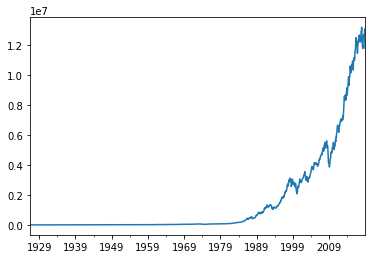

In [45]:
wealth_index.plot()

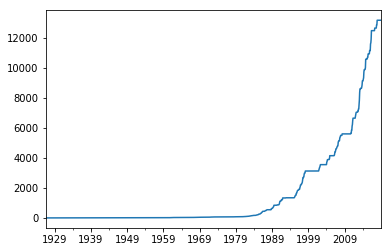

In [52]:
previous_peaks=wealth_index.cummax()
previous_peaks.plot()

In [53]:
previous_peaks

1926-07        1.005600
1926-08        1.031645
1926-09        1.043612
1926-10        1.043612
1926-11        1.075919
               ...     
2018-08    13161.035989
2018-09    13161.035989
2018-10    13161.035989
2018-11    13161.035989
2018-12    13161.035989
Freq: M, Name: Food, Length: 1110, dtype: float64

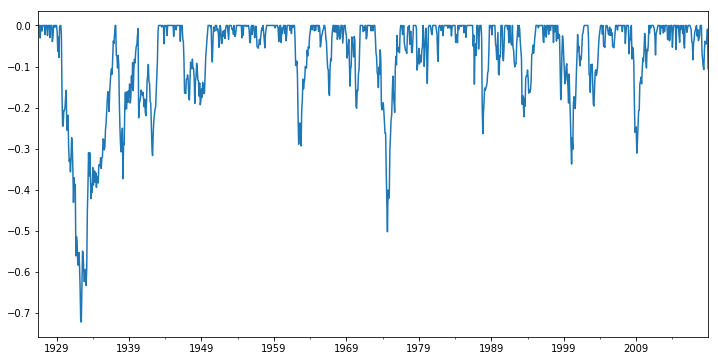

In [61]:
drawdowns=(wealth_index-previous_peaks)/previous_peaks
drawdowns.plot(figsize=(12,6))

In [55]:
drawdowns.min()

-0.7221855547819795

### OR we can do it directly by:

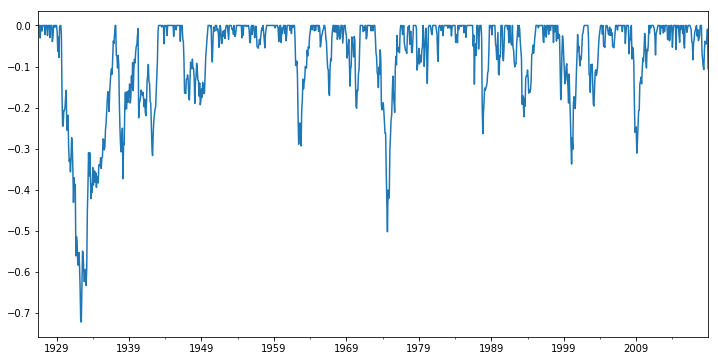

In [60]:
drawdowns1=ak.drawdown(ind["Food"])["Drawdown"]
drawdowns1.plot(figsize=(12,6))

In [59]:
drawdowns1.min()

-0.7221855547819795

#### Now, lets compute VaRs for the different industries that we have in our dataset

In [63]:
ind_var=ak.var_corfish(ind).sort_values(ascending=True)

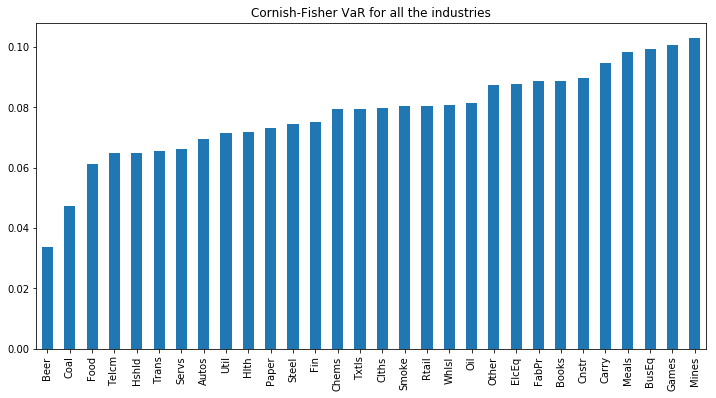

In [74]:
ind_var.plot(kind="bar", title="Cornish-Fisher VaR for all the industries", figsize=(12,6))

#### Which industry has the higest Corn-fish VaR?

In [77]:
ind_var.idxmax()

'Mines'

#### How much?

In [78]:
ind_var.max()

0.10278216214434804

##### BTW, this is 10.27% loss on a monthly basis

#### We have to compute these descriptive stats like mean, std, SR etc. so much in the future. That is why, instead of writing the full code everytime here, lets update those in our toolkit

##### Now that we have updates, lets calculate some of those metrics

### Annualized returns of industries

In [80]:
%autoreload

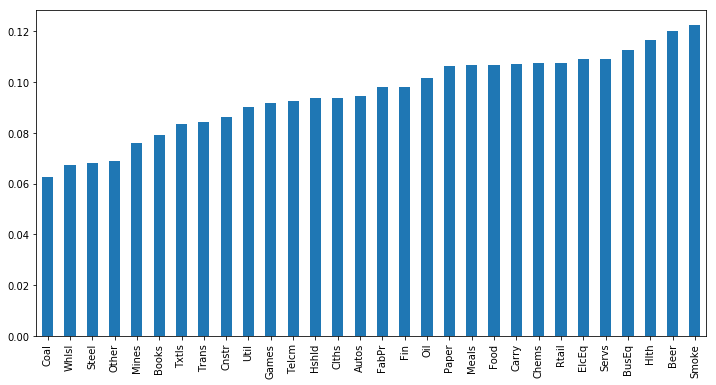

In [86]:
ak.annualize_rets(ind,12).sort_values().plot(kind="bar", figsize=(12,6))

#### Annualized volatility of the industries

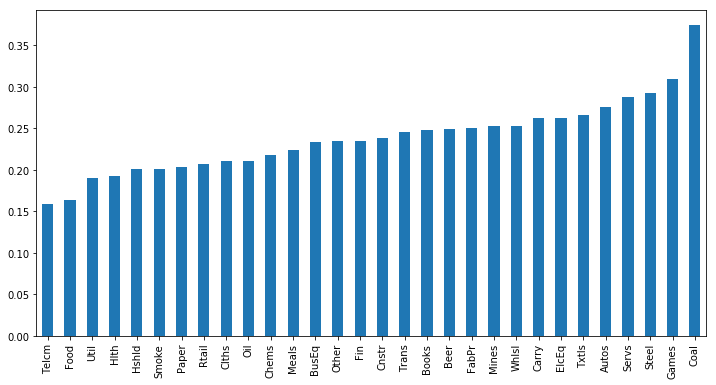

In [92]:
vol_ann=ak.annualize_vol(ind, 12).sort_values()
vol_ann.plot(kind="bar", figsize=(12,6))

In [93]:
vol_ann.tail()

Autos    0.275035
Servs    0.288004
Steel    0.292022
Games    0.308881
Coal     0.373938
dtype: float64

#### If you were to argue that standard deviation is not the right measure, you can use semi-deviation

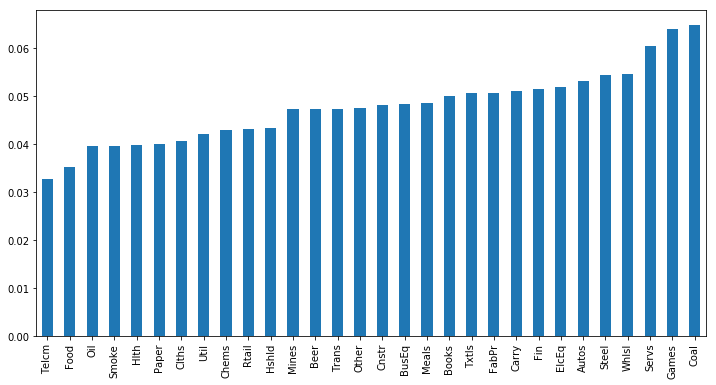

In [96]:
sem_dev=ak.semideviation(ind).sort_values()
sem_dev.plot(kind="bar", figsize=(12,6))

In [97]:
sem_dev.tail()

Steel    0.054259
Whlsl    0.054464
Servs    0.060342
Games    0.063876
Coal     0.064684
dtype: float64

#### The standard dev and semi dev seems to be overlapping in this case

### Sharpe Ratio of the industries

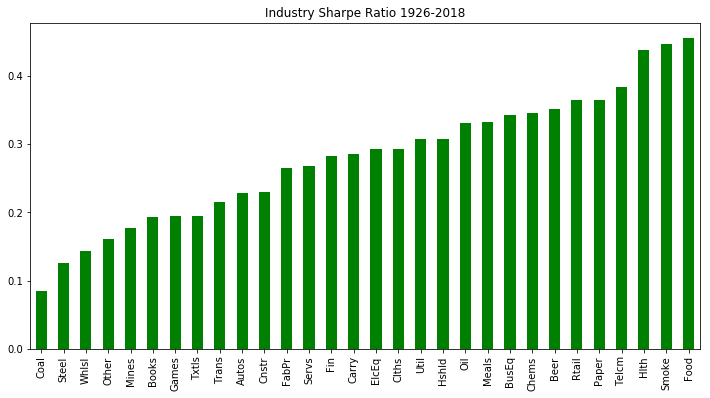

In [100]:
sr_ind=ak.sharpe_ratio(ind, 0.03, 12).sort_values()
sr_ind.plot(figsize=(12,6), kind="bar", title="Industry Sharpe Ratio 1926-2018", color="g")

#### So the coal's risk adjusted returns is pretty dismal. This is due to high vol and low avg returns.

#### If you wanna compute SRs year 2000 onwards

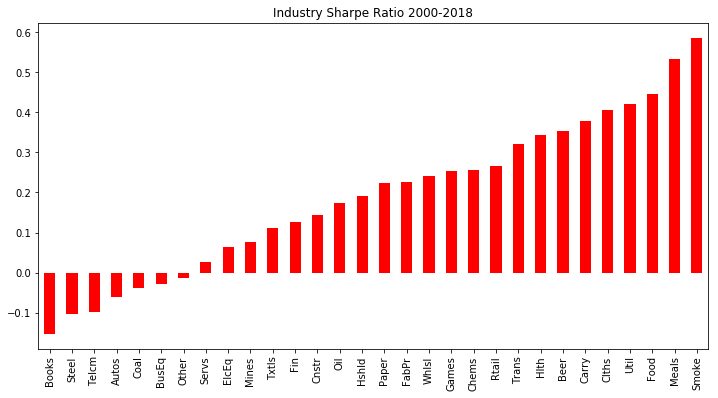

In [103]:
sr_ind_sample=ak.sharpe_ratio(ind["2000":], 0.03, 12).sort_values()
sr_ind_sample.plot(figsize=(12,6), kind="bar", title="Industry Sharpe Ratio 2000-2018", color="r")

#### We can see that when we select a specific sample from the full sample, there are some industries that turns out have a negative SRs

## Efficient frontier

#### To compute an efficient frontier, we need two sets of things:

##### i) set of expected returns
##### ii) covariance matrix (vol and correlation coeff/covariance is embedded here)

#### Expected returns is a bit tricky because we have no idea what the future holds. So, in our case, all we can do is an in-sample exercise and treat the actual realized return as expected returns. 

#### IOW, we are saying "lets look at what the efficient frontier WAS over that period"

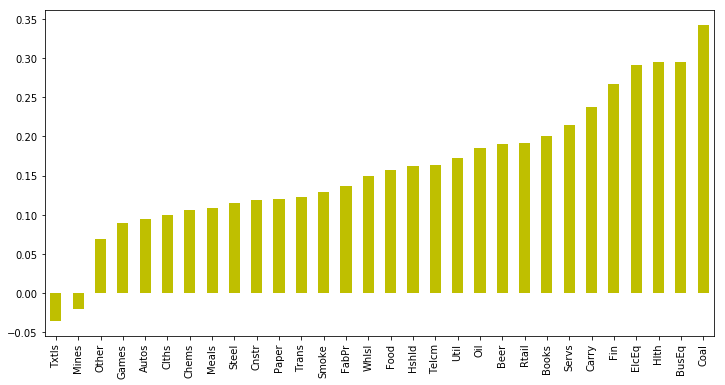

In [105]:
er=ak.annualize_rets(ind["1995":"2000"], 12).sort_values()
er.plot(kind="bar", figsize=(12,6), color="y")

### Time for the covar matrix

In [106]:
cov=ind["1995":"2000"].cov()